# DS-210: Programming for Data Science


# Lecture 14: Overview of programming languages.


## Attendance: https://piazza.com/class/lrat4tm83gbnz

## Various levels

* Native code

* Assembler
  - pros: as fine control as in native code
  - cons: not portable


* High level
  - various levels of closeness to the architecture: from C to Prolog
  - efficiency:
    - varies
    - could optimize better
  - pros:
    - very portable
    - easier to build large projects
  - cons:
    - some languages are resource–inefficient

## Assembly Language Examples
`  ARM                          X86
. text                       section .text
.global _start                 global _start
_start:                      section .data
   mov r0, #1                msg db  'Hello, world!',0xa
   ldr r1, =message          len equ 0xe
   ldr r2, =len              section .text
   mov r7, #4                _start:
   swi 0                     mov edx,len ;message length
   mov r7, #1                mov ecx,msg ;message to write
                             mov ebx,1   ;file descriptor (stdout)
.data.                       mov eax,4   ;system call number (sys_write)
message:                     int 0x80    ;call kernel
   .asciz "hello world!\n"   mov ebx,0   ;process' exit code
len = .-message.             mov eax,1   ;system call number (sys_exit)
                             int 0x80    ;call kernel - this interrupt won't return
`

## Interpreted vs. compiled

Interpreted:
* An application (*interpreter*) reads commands one by one and executes them.
* One step process to run an application:
  - `python hello.py`

("Fully") Compiled:
 * Translated to native code by *compiler*
 * Usually more efficient
 * Two steps to execute:
   1. Compile (Rust: `rustc hello.rs`)
   2. Run (Rust: `./hello`)
   
Compiled to intermediate format:
 * Example: Java
   - Portable intermediate format
   - Needs another application, Java virtual machine, that knows how to interpret it
   
JIT is an interesting wrinkle in that it can take interpreted and intermediate format languages and compile them down to machine code.

## Type checking: static vs. dynamic

Dynamic (e.g., Python):
* checks if an object can be used for specific operation during runtime
* pros:
  - don't have to specify the type of object
  - procedures can work for various types
  - faster or no compilation
* cons:
  - slower at runtime
  - problems are detected late



In [2]:
def add(x,y):
    return x + y

print(add(2,2))
print(add("a","b"))
print(add(2,"b"))

4
ab


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [5]:
import typing
def add(x:str, y:str) -> str:
    return x + y
print(add(2,2))
print(add("ab", "cd"))
#print(add(2,"n"))

4
abcd


* Use mypy as a type checker before running your programs  
* `pip3 install mypy`

## Type checking: static vs. dynamic

Static (e.g, C++, Rust, OCaml, Java):
* checks if types of objects are as desired
* pros:
  - faster at runtime
  - type mismatch detected early
* cons:
  - often need to be explicit with the type
  - making procedures generic may be difficult
  - potentially slower compilation



C++:
```C++
int add(int x, int y) {
    return x + y;
}
```

Rust:
```rust
fn add(x:i32, y:i32) -> i32 {
    x + y
}
```

## Type checking: static vs. dynamic

**Note:** some languages are smart and you don't have to always specify types (e.g., OCaml, Rust)

Rust:
```rust
let x : i32 = 7;
let y = 3;
let z = x * y;
```

## Various programming paradigms
* Imperative
* Functional
* Object-oriented
* Declarative / programming in logic

```
def factorial(N):
    ret = 1
    for i in range(N):
        ret = ret * i
    return ret
```

```
(define (factorial n) (cond ((= n 0) 1) 
                            (t (* n (factorial (- n 1)))))) 
```

```
class Factorial {
   private:
     int64 value;
   public:
     int64 factorial(int input) {
        int64 temp = 1;
        for(int i=1; i<=input; i++) {
            temp = temp * i;
        }
        value = temp
     }
     int64 get_factorial() {
        return value;
     }
}
```

```
factorial(0,1).
factorial(N,M) :-
N>0,
N1 is N-1,
factorial(N1, M1),
M is N*M1.
```

## Memory management: manual vs. garbage collection

Manual:
* Need to ask for memory and return it, more explicitly
* pros:
  - more efficient
  - better in real–time applications
* cons:
  - more work for the programmer
  - more prone to errors

Garbage collection:
* Memory freed automatically
* pros:
  - less work for the programmer
  - more difficult to make mistakes
* cons:
  - less efficient
  - can lead to sudden slowdowns

Rust has many features to avoid memory management errors

## Rust

* high–level

* compiled

* static type checking

* <b> manual memory management </b>

## Most important difference between Python and Rust?

<div align="center">
    <h3>Braces, <tt>{  }</tt>, for code formatting!</h3>
    😃😃😃
</div>

* How do we denote blocks of code?

  - Python: indentation
  - Rust: `{...}`

```rust
fn hi() {
    println!("Hello!");
    println!("How are you?");
}
```

* Don't be afraid of braces!!! You'll encounter them in C, C++, Java, Javascript, PHP, Rust, ...

## Structure of an executable

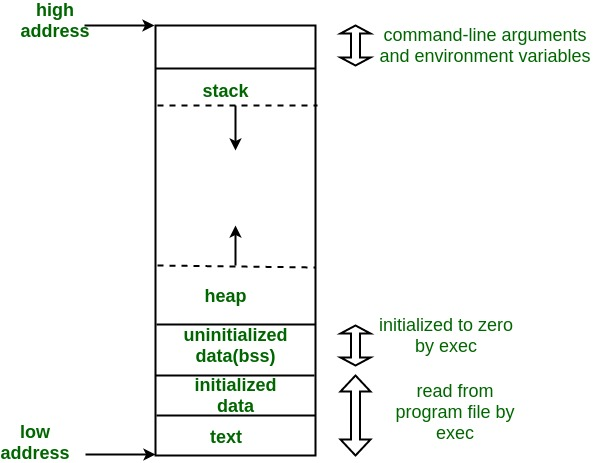

## An example of terrible unsafe programming in C
```
#include <signal.h>
#include <stdio.h>
#include <string.h>
#include <stdlib.h>
int main(){
    char loop_bool[20];
    char secretString[20];
    char givenString[20];
    char x;
    int i, ret;

    memset(&loop_bool, 0, 20);
    for (i=0;i<19;i++) {
      x = 'a' + random() % 26; 
      secretString[i] = x;
    }
    printf("secretString: %s\n", secretString);
    while (!loop_bool[0]) { 
        gets(givenString);
        ret = strncmp(secretString, givenString, 20);
        if (0 == ret) {
            printf("SUCCESS!\n");
	    break;
	}else if (ret < 0){
	    printf("LESS!\n");
	} else {
	    printf("MORE!\n");
        }
        printf("secretString: %s\n", secretString);
    }
    printf("secretString: %s\n", secretString);
    printf("givenString: %s\n", givenString);
    return 0;
}
```

### Who are these people?
* Guido Van Rossum
* Graydon Hoare
* Bjarne Stroustrup
* James Gosling
* Brendan Eich
* Brian Kernighan and Dennis Ritchie

### Who are these people?
* Guido Van Rossum  --  Python
* Graydon Hoare  --  Rust
* Bjarne Stroustrup  -- C++
* James Gosling  --  Java
* Brendan Eich  --  Javascript
* Brian Kernighan and Dennis Ritchie  -- C